In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from matplotlib import rc_context

In [2]:
ms_style_dict = {'text.usetex': True, 'font.family': 'serif', 'axes.linewidth': 1.2,
                 'xtick.major.width': 1.2, 'xtick.major.size': 4,
                 'ytick.major.width': 1.2, 'ytick.major.size': 4,
                 'xtick.minor.width': 1.2, 'xtick.minor.size': 2,
                 'ytick.minor.width': 1.2, 'ytick.minor.size': 2,
                 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'text.latex.preamble': r'\usepackage[T1]{fontenc}'
                 r'\usepackage{amsmath}' r'\usepackage{siunitx}'
                 r'\sisetup{detect-all=True}' r'\usepackage{fixltx2e}'}

In [3]:
with h5py.File('../../sav/EIS/Doppler/west_upflow_doppler_violin.h5', 'r') as hf:
    fe_12_195_west = hf['fe_12_195'][:]
    fe_08_185_west = hf['fe_08_185'][:]
    fe_09_197_west = hf['fe_09_197'][:]
    fe_10_184_west = hf['fe_10_184'][:]
    fe_11_188_west = hf['fe_11_188'][:]
    fe_13_203_west = hf['fe_13_202'][:]
    si_07_275_west = hf['si_07_275'][:]

with h5py.File('../../sav/EIS/Doppler/east_upflow_doppler_violin.h5', 'r') as hf:
    fe_12_195_east = hf['fe_12_195'][:]
    fe_08_185_east = hf['fe_08_185'][:]
    fe_09_197_east = hf['fe_09_197'][:]
    fe_10_184_east = hf['fe_10_184'][:]
    fe_11_188_east = hf['fe_11_188'][:]
    fe_13_203_east = hf['fe_13_202'][:]
    fe_14_264_east = hf['fe_14_264'][:]


In [4]:
fe_12_195_west = fe_12_195_west[np.abs(fe_12_195_west) < 60]
fe_08_185_west = fe_08_185_west[np.abs(fe_08_185_west) < 60]
fe_09_197_west = fe_09_197_west[np.abs(fe_09_197_west) < 60]
fe_10_184_west = fe_10_184_west[np.abs(fe_10_184_west) < 60]
fe_11_188_west = fe_11_188_west[np.abs(fe_11_188_west) < 60]
fe_13_203_west = fe_13_203_west[np.abs(fe_13_203_west) < 60]
si_07_275_west = si_07_275_west[np.abs(si_07_275_west) < 60]
fe_12_195_east = fe_12_195_east[np.abs(fe_12_195_east) < 60]
fe_08_185_east = fe_08_185_east[np.abs(fe_08_185_east) < 60]
fe_09_197_east = fe_09_197_east[np.abs(fe_09_197_east) < 60]
fe_10_184_east = fe_10_184_east[np.abs(fe_10_184_east) < 60]
fe_11_188_east = fe_11_188_east[np.abs(fe_11_188_east) < 60]
fe_13_203_east = fe_13_203_east[np.abs(fe_13_203_east) < 60]
fe_14_264_east = fe_14_264_east[np.abs(fe_14_264_east) < 60]


In [5]:
with h5py.File('../../sav/SPICE/upflow_region/east_upflow_violin_spice.h5', 'r') as hf:
    ne_8_770_east = hf['ne_8_770_vel'][:]

with h5py.File('../../sav/SPICE/upflow_region/west_upflow_violin_spice.h5', 'r') as hf:
    ne_8_770_west = hf['ne_8_770_vel'][:]
    ne_8_770_west = ne_8_770_west[np.abs(ne_8_770_west) < 40]

Text(0, 0.5, 'Doppler Velocity [km/s]')

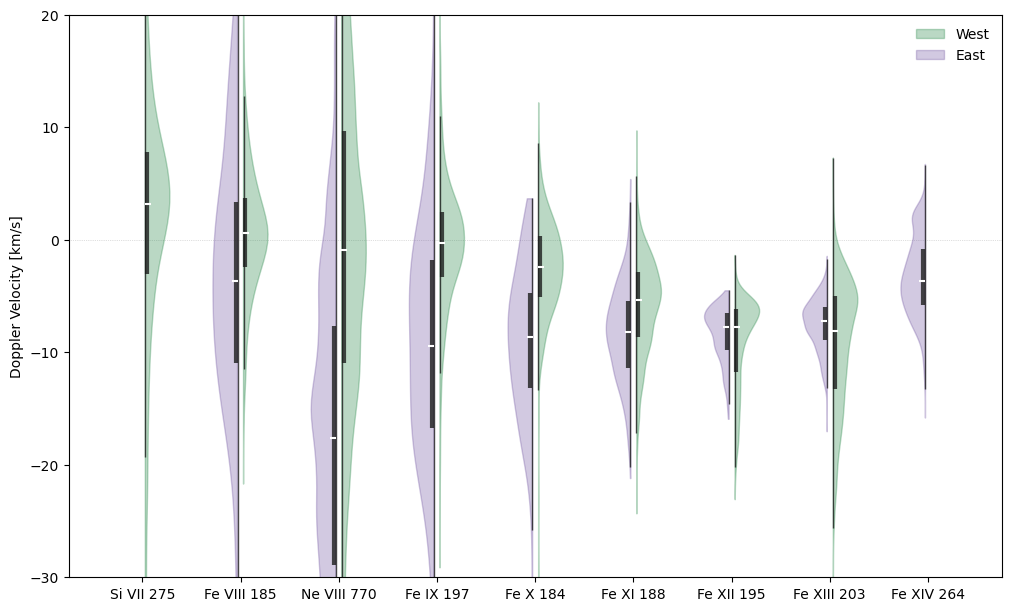

In [6]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.min((np.max(vals), upper_adjacent_value))

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.max((np.min(vals), lower_adjacent_value))
    return lower_adjacent_value, upper_adjacent_value


fig, ax = plt.subplots(layout='constrained', figsize=(10, 6))

labels = ['Si VII 275', 'Fe VIII 185', 'Ne VIII 770', 'Fe IX 197', 'Fe X 184', 'Fe XI 188', 'Fe XII 195', 'Fe XIII 203',
          'Fe XIV 264']

all_data_west = [si_07_275_west, fe_08_185_west, ne_8_770_west, fe_09_197_west, fe_10_184_west,
                  fe_11_188_west, fe_12_195_west, fe_13_203_west]
position_west = np.array([1,2,3,4,5,6,7,8])

all_data_east = [fe_08_185_east, ne_8_770_east ,fe_09_197_east, fe_10_184_east,
                    fe_11_188_east, fe_12_195_east, fe_13_203_east, fe_14_264_east]

position_east = np.array([2,3,4,5,6,7,8,9])
                 
vp_west = ax.violinplot(all_data_west, positions=position_west,showmeans=False,
                      showmedians=False, showextrema=False,
                      side='high')

vp_east = ax.violinplot(all_data_east, positions=position_east,showmeans=False,
                        showmedians=False, showextrema=False,
                        side='low')

for pc in vp_west['bodies']:
    pc.set_facecolor((27/255.,129/255.,62/255.,0.5))
    pc.set_edgecolor((27/255.,129/255.,62/255.,1))
    pc.set_offsets([3,0])

for pc in vp_east['bodies']:
    pc.set_facecolor((106/255.,76/255.,156/255.,0.5))
    pc.set_edgecolor((106/255.,76/255.,156/255.,1))
    pc.set_offsets([-3,0])

west_quartile1, west_medians, west_quartile3 = [], [], []

for data in all_data_west:
    west_quartile1.append(np.nanpercentile(data, 25))
    west_medians.append(np.nanpercentile(data, 50))
    west_quartile3.append(np.nanpercentile(data, 75))

west_whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(all_data_west, west_quartile1, west_quartile3)])
west_whiskers_min, west_whiskers_max = west_whiskers[:, 0], west_whiskers[:, 1]

ln_quart_west = ax.vlines(position_west, west_quartile1, west_quartile3, color='#1C1C1C', linestyle='-', lw=3,
                        alpha=0.8)
ln_quart_west.set_offsets([4.9,0])
ln_whisker_west = ax.vlines(position_west, west_whiskers_min, west_whiskers_max, color='#1C1C1C', linestyle='-', lw=1,
                        alpha=0.8)
ln_whisker_west.set_offsets([3,0])
ln_median_west = ax.scatter(position_west+5.65/100, west_medians, marker='_', color='white', s=14,zorder=5)

east_quartile1, east_medians, east_quartile3 = [], [], []

for data in all_data_east:
    east_quartile1.append(np.percentile(data, 25))
    east_medians.append(np.percentile(data, 50))
    east_quartile3.append(np.percentile(data, 75))

east_whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(all_data_east, east_quartile1, east_quartile3)])

east_whiskers_min, east_whiskers_max = east_whiskers[:, 0], east_whiskers[:, 1]

ln_quart_east = ax.vlines(position_east, east_quartile1, east_quartile3, color='#1C1C1C', linestyle='-', lw=3,
                        alpha=0.8)
ln_quart_east.set_offsets([-4.9,0])
ln_whisker_east = ax.vlines(position_east, east_whiskers_min, east_whiskers_max, color='#1C1C1C', linestyle='-', lw=1,
                        alpha=0.8)
ln_whisker_east.set_offsets([-3,0])
ln_median_east = ax.scatter(position_east-5.65/100, east_medians, marker='_', color='white', s=14,zorder=5)


ax.legend([vp_west['bodies'][0], vp_east['bodies'][0]], ['West', 'East'], frameon=False)
ax.axhline(0, color='grey', lw=0.5, ls=':',alpha=0.5, zorder=0)

ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
ax.set_xlim(0.25, len(labels) + 0.75)
ax.set_ylim(-30,20)
ax.set_ylabel('Doppler Velocity [km/s]')

# ax.plot(position_west, west_medians, color='green')
# ax.plot(position_east, east_medians, color='purple')

# plt.savefig('../../figs/test_figs/DopplerViolin.pdf', dpi=300, bbox_inches='tight')

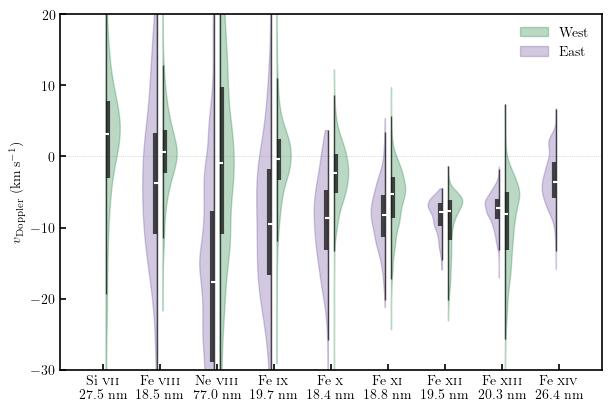

In [15]:
with rc_context(ms_style_dict):
    fig, ax = plt.subplots(layout='constrained', figsize=(6,4))

    labels = [r'Si \textsc{vii} 27.5', r'Fe \textsc{viii} 18.5', r'Ne \textsc{viii} 77.0', r'Fe \textsc{ix} 19.7',
              r'Fe \textsc{x} 18.4', r'Fe \textsc{xi} 18.8', r'Fe \textsc{xii} 19.5', r'Fe \textsc{xiii} 20.3',
              r'Fe \textsc{xiv} 26.4']
    
    for ii, label in enumerate(labels):
        label_split = label.split(' ')
        if len(label_split) == 3:
            label = label_split[0] + ' ' + label_split[1] + '\n' + label_split[2] + r' nm'
            labels[ii] = label


    all_data_west = [si_07_275_west, fe_08_185_west, ne_8_770_west, fe_09_197_west, fe_10_184_west,
                    fe_11_188_west, fe_12_195_west, fe_13_203_west]
    position_west = np.array([1,2,3,4,5,6,7,8])

    all_data_east = [fe_08_185_east, ne_8_770_east ,fe_09_197_east, fe_10_184_east,
                        fe_11_188_east, fe_12_195_east, fe_13_203_east, fe_14_264_east]

    position_east = np.array([2,3,4,5,6,7,8,9])
                    
    vp_west = ax.violinplot(all_data_west, positions=position_west,showmeans=False,
                        showmedians=False, showextrema=False,
                        side='high')

    vp_east = ax.violinplot(all_data_east, positions=position_east,showmeans=False,
                            showmedians=False, showextrema=False,
                            side='low')

    for pc in vp_west['bodies']:
        pc.set_facecolor((27/255.,129/255.,62/255.,0.5))
        pc.set_edgecolor((27/255.,129/255.,62/255.,1))
        pc.set_offsets([3,0])

    for pc in vp_east['bodies']:
        pc.set_facecolor((106/255.,76/255.,156/255.,0.5))
        pc.set_edgecolor((106/255.,76/255.,156/255.,1))
        pc.set_offsets([-3,0])

    west_quartile1, west_medians, west_quartile3 = [], [], []

    for data in all_data_west:
        west_quartile1.append(np.nanpercentile(data, 25))
        west_medians.append(np.nanpercentile(data, 50))
        west_quartile3.append(np.nanpercentile(data, 75))

    west_whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(all_data_west, west_quartile1, west_quartile3)])
    west_whiskers_min, west_whiskers_max = west_whiskers[:, 0], west_whiskers[:, 1]

    ln_quart_west = ax.vlines(position_west, west_quartile1, west_quartile3, color='#1C1C1C', linestyle='-', lw=3,
                            alpha=0.8)
    ln_quart_west.set_offsets([4.9,0])
    ln_whisker_west = ax.vlines(position_west, west_whiskers_min, west_whiskers_max, color='#1C1C1C', linestyle='-', lw=1,
                            alpha=0.8)
    ln_whisker_west.set_offsets([3,0])
    ln_median_west = ax.scatter(position_west+5.65/100, west_medians, marker='_', color='white', s=14,zorder=5)

    east_quartile1, east_medians, east_quartile3 = [], [], []

    for data in all_data_east:
        east_quartile1.append(np.percentile(data, 25))
        east_medians.append(np.percentile(data, 50))
        east_quartile3.append(np.percentile(data, 75))

    east_whiskers = np.array([
        adjacent_values(sorted_array, q1, q3)
        for sorted_array, q1, q3 in zip(all_data_east, east_quartile1, east_quartile3)])

    east_whiskers_min, east_whiskers_max = east_whiskers[:, 0], east_whiskers[:, 1]

    ln_quart_east = ax.vlines(position_east, east_quartile1, east_quartile3, color='#1C1C1C', linestyle='-', lw=3,
                            alpha=0.8)
    ln_quart_east.set_offsets([-4.9,0])
    ln_whisker_east = ax.vlines(position_east, east_whiskers_min, east_whiskers_max, color='#1C1C1C', linestyle='-', lw=1,
                            alpha=0.8)
    ln_whisker_east.set_offsets([-3,0])
    ln_median_east = ax.scatter(position_east-5.65/100, east_medians, marker='_', color='white', s=14,zorder=5)


    ax.legend([vp_west['bodies'][0], vp_east['bodies'][0]], ['West', 'East'], frameon=False)
    ax.axhline(0, color='grey', lw=0.5, ls=':',alpha=0.5, zorder=0)

    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_ylim(-30,20)
    ax.set_ylabel(r'$v_{\rm Doppler}\ \mathrm{(km\,s^{-1})}$')

    plt.savefig('../../figs/test_figs/DopplerViolin_latex.pdf', dpi=300, bbox_inches='tight')
    plt.show()

In [11]:
ln_median_west.get_offset_transform().transform([1,0])  

array([112.93887655, 303.13997567])

In [12]:
ln_median_west.get_offset_transform().inverted().transform([3,0])

array([ -0.40865932, -32.26127007])

In [13]:
ln_median_west.get_offset_transform()